### Linear Model Selection Example 2.3
Unfortunately, at the time of writing, **SequentialFeatureSelector()** does not return model scores. However, we can still use the function to iteratively find the best model. 

The below figure displays the  $ \mbox{R}^2 $ and the adjusted $ \mbox{R}^2 $ for the best model of each size produced by forward stepwise selection on the **Credit** data set. Using the adjusted $ \mbox{R}^2 $ we select a model that contains seven variables - which however is not easy to detect by eye in the plot.

If we compare the $ \mbox{R}^{2} $ for the best model of each size as a function of the number of predictors then we observe that the values of $ \mbox{R}^2 $ are steadily increasing.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from LMS_def import *

# Load data
df = pd.read_csv('./data/Credit.csv')

# Convert Categorical variables
df = pd.get_dummies(data=df, drop_first=True, 
                    prefix=('Gender_', 'Student_', 
                            'Married_', 'Ethnicity_'))

x_full = df.drop(columns='Balance')
y = df['Balance']

# define Linear Regression Model in sklearn
linearmodel = LinearRegression()

# Predefine DataFrame
results = pd.DataFrame(data={'BIC': [], 'AIC': [], 'R2': [],
                             'R2_adj': [], 'RSS': []})

# For each number of selected features:
for i in range(1, x_full.shape[1]):
    # Sequential Feature Selection using sklearn
    sfs = SequentialFeatureSelector(linearmodel, n_features_to_select=i, 
                              direction='forward')
    sfs.fit(x_full, y)
    chosen_predictors = x_full.columns[sfs.support_].values
    
    # Fit a linear model using the chosen predictors:
    results_i = fit_linear_reg(x_full[chosen_predictors], y)
    results_i = results_i.rename(str(i))
    # Save results 
    results = results.append(results_i)

print(results)

            BIC          AIC        R2    R2_adj           RSS
1   5502.764477  5494.781548  0.745848  0.745210  2.143512e+07
2   5224.531479  5212.557085  0.875118  0.874489  1.053254e+07
3   4865.352851  4849.386992  0.949879  0.949499  4.227219e+06
4   4852.481331  4832.524008  0.952188  0.951703  4.032502e+06
5   4841.615607  4817.666820  0.954161  0.953579  3.866091e+06
6   4842.979215  4815.038963  0.954688  0.953996  3.821620e+06
7   4847.838075  4815.906359  0.954816  0.954009  3.810814e+06
8   4852.927218  4817.004037  0.954918  0.953995  3.802227e+06
9   4858.908583  4818.993938  0.954919  0.953879  3.802131e+06
10  4864.338343  4820.432233  0.954982  0.953825  3.796796e+06
11  4869.086336  4821.188761  0.955122  0.953850  3.785011e+06


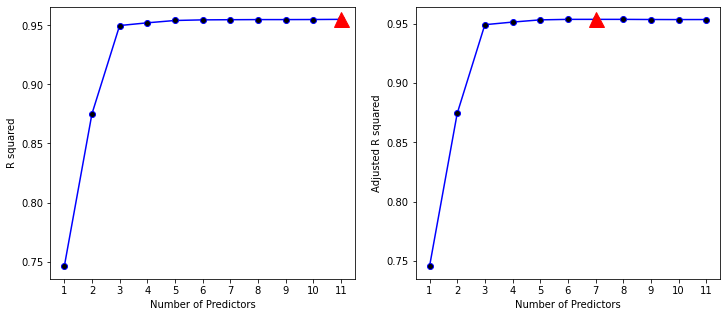

In [2]:
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure(figsize=(12, 5))

# Plot R^2, including maximum 
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(results.loc[:, 'R2'], 'b-',  
         marker='o', markerfacecolor='black')
ax1.plot(np.argmax(results.loc[:, 'R2']), 
         np.max(results.loc[:, 'R2']), 
         'r^', markersize=15)
ax1.set_xlabel('Number of Predictors')
ax1.set_ylabel('R squared')

# Plot R^2 adjusted, including maximum 
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(results.loc[:, 'R2_adj'], 'b-',  
         marker='o', markerfacecolor='black')
ax2.plot(np.argmax(results.loc[:, 'R2_adj']), 
         np.max(results.loc[:, 'R2_adj']), 
         'r^', markersize=15)
ax2.set_xlabel('Number of Predictors')
ax2.set_ylabel('Adjusted R squared')

plt.show()

This is not the case for the values of the adjusted $ \mbox{R}^{2} $. As the **Python**-output reveals, the adjusted $ \mbox{R}^2 $ reaches a maximum for seven predictors, after that the values start decreasing. 

Using the adjusted $ \mbox{R}^2 $ results in the selection of the following regression model that was produced by forward selection 

\begin{align*}
balance
&=\beta_{0}+\beta_{1}\cdot income +\beta_{2}\cdot limit +\beta_{3}\cdot rating +\beta_{4}\cdot cards \\
&\quad+\beta_{5}\cdot age +\beta_{6}\cdot gender +\beta_{7}\cdot student +\epsilon
\end{align*}

### Linear Model Selection Example 2.4
The left-hand panel displays the AIC, the right hand panel the BIC.

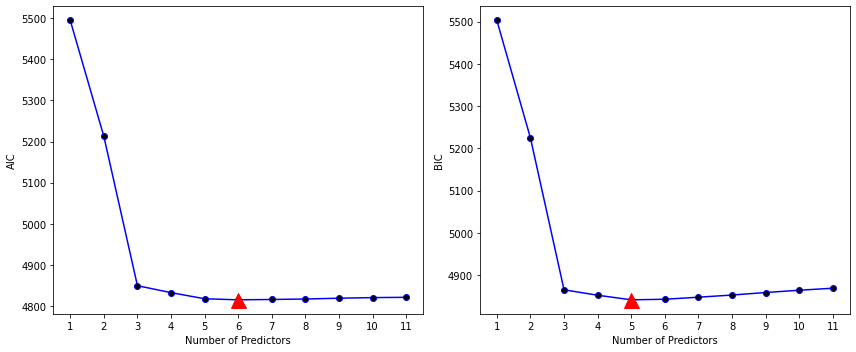

In [3]:
# Create figure
fig = plt.figure(figsize = (12, 5))

# Plot AIC
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(results.loc[:, 'AIC'], 'b-', 
         marker='o', markerfacecolor='black')
ax1.plot(np.argmin(results.loc[:, 'AIC']), 
         np.min(results.loc[:, 'AIC']), 
         'r^', markersize=15)
ax1.set_ylabel('AIC')
ax1.set_xlabel('Number of Predictors')


# Plot BIC
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(results.loc[:, 'BIC'], 'b-',  
         marker='o', markerfacecolor='black')
ax2.plot(np.argmin(results.loc[:, 'BIC']), 
         np.min(results.loc[:, 'BIC']), 
         'r^', markersize=15)
ax2.set_xlabel('Number of Predictors')
ax2.set_ylabel('BIC')

plt.tight_layout()
plt.show()

Note that we have to add 1 to the index of the minimum value, as the index starts at 0, whereas the number of predictors starts at 1.

According to the AIC criterion, the best among all models produced by forward stepwise selection contains six predictor variables. 

In [4]:
print(np.argmin(results.loc[:, 'AIC']) + 1)

6


The (last) **Python**-output of displays the six predictors of the best model produced by forward selection.
\begin{align*}
balance
&=\beta_{0}+\beta_{1}\cdot income +\beta_{2}\cdot limit +\beta_{3}\cdot rating +\beta_{4}\cdot cards \\
&\quad+\beta_{5}\cdot age +\beta_{6}\cdot student +\epsilon
\end{align*}
